In [1]:
import math

## 字符串

### 1. KMP算法  

KMP算法用于解决字符串匹配问题，假设文本串长度为m，模式串长度为n，当我们使用暴力匹配时，时间复杂度为$O(m*n)$.  
思想：当出现字符串不匹配时，可以记录一部分之前已经匹配的文本内容，利用这些信息避免从头再去做匹配。  
为此，我们要找到"最长相等前后缀"，字符串的前缀是指包含首字符但不包含尾字符的子串，后缀即包含尾字符但不包含首字符的子串。 
我们需要建立前缀表来告诉我们以某个字符结尾的最长相等前后缀的长度。前缀表就是KMP中核心的next数组。  
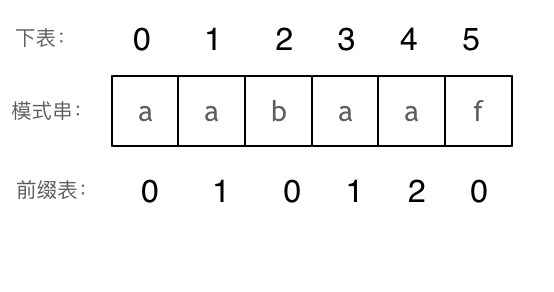  
next数组即可以就是前缀表，也可以是前缀表统一减一（右移一位，初始位置为-1）。  
使用next数组来进行匹配，时间复杂度可以降到$O(m+n)$。  

In [1]:
def getNext(next, s):
    """
    双指针法构建next数组，最关键步骤为j=next[j-1]
    """
    # 初始化j = 0
    j = 0
    next[0] = 0
    for i in range(1, len(s)):
        # 从1开始遍历i，判断s[i]和s[j]是否匹配
        # 若不匹配，则j回退到前一位next数组对应的位置，即以第j-1个字符为结尾的字串的最长相等前缀的后一个位置，从这个开始匹配
        # 注意这边是while，要不断回退指导匹配上或者j=0为止，必须保证j>0，因为要取next[j-1]
        # 然后赋值next[i] = j
        while j > 0 and s[i] != s[j]:
            # 关键步骤
            j = next[j-1]
        # 如果相等，此时以第i个字符结尾的字串，最长相等前后缀长度其实就是j+1，则j+=1, 赋值next[i]=j
        if s[i] == s[j]:
            j += 1
        # 将相等和不相等两种情况合并
        next[i] = j

In [2]:
# 测试
s = 'aabaaf'
next = [0]*len(s)
getNext(next, s)
next

[0, 1, 0, 1, 2, 0]

In [3]:
def getNext_1(next, s):
    """
    前缀表减一实现，最关键步骤为j=next[j]
    """
    # 初始化j = -1
    j = -1
    next[0] = -1
    for i in range(1, len(s)):
        # 从1开始遍历i，判断s[i]和s[j]是否匹配
        # 若不匹配，则j回退到前一位next数组对应的位置，即以第j-1个字符为结尾的字串的最长相等前缀的后一个位置，从这个开始匹配
        # 注意这边是while，要不断回退指导匹配上或者j=0为止，必须保证j>0，因为要取next[j-1]
        # 然后赋值next[i] = j
        while j >= 0 and s[i] != s[j+1]:
            j = next[j]
        # 如果相等，此时以第i个字符结尾的字串，最长相等前后缀长度其实就是j+1，则j+=1, 赋值next[i]=j
        if s[i] == s[j+1]:
            j += 1
        # 将相等和不相等两种情况合并
        next[i] = j

In [4]:
# 测试
s = 'aabaaf'
next = [0]*len(s)
getNext_1(next, s)
next

[-1, 0, -1, 0, 1, -1]

In [7]:
def strStr(haystack, needle):
    """
    利用next数组匹配
    """
    m, n = len(haystack), len(needle)
    next = [0] * n
    getNext(next, needle)
    j = -1
    for i in range(m):
        while j > 0 and haystack[i] != needle[j]:
            j = next[j-1]
        if haystack[i] == needle[j]:
            j += 1
        # 由于匹配时j先加1，所以要判断j是否等于n来证明完全匹配
        if j == n:
            return i - n + 1
    return -1